Dataset Preview:
        Date Product_Category   Price  Discount Customer_Segment  \
0 2023-01-01           Sports  932.80     35.82       Occasional   
1 2023-01-02             Toys  569.48      3.60          Premium   
2 2023-01-03       Home Decor  699.68      3.56          Premium   
3 2023-01-04             Toys  923.27      0.61          Premium   
4 2023-01-05             Toys  710.17     47.83          Premium   

   Marketing_Spend  Units_Sold     sales  
0          6780.38          32  29849.60  
1          6807.56          16   9111.68  
2          3793.91          27  18891.36  
3          9422.75          29  26774.83  
4          1756.83          17  12072.89  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Product_Category  1000 non-nu

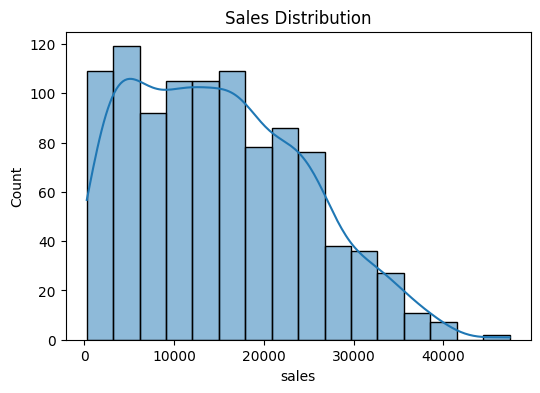

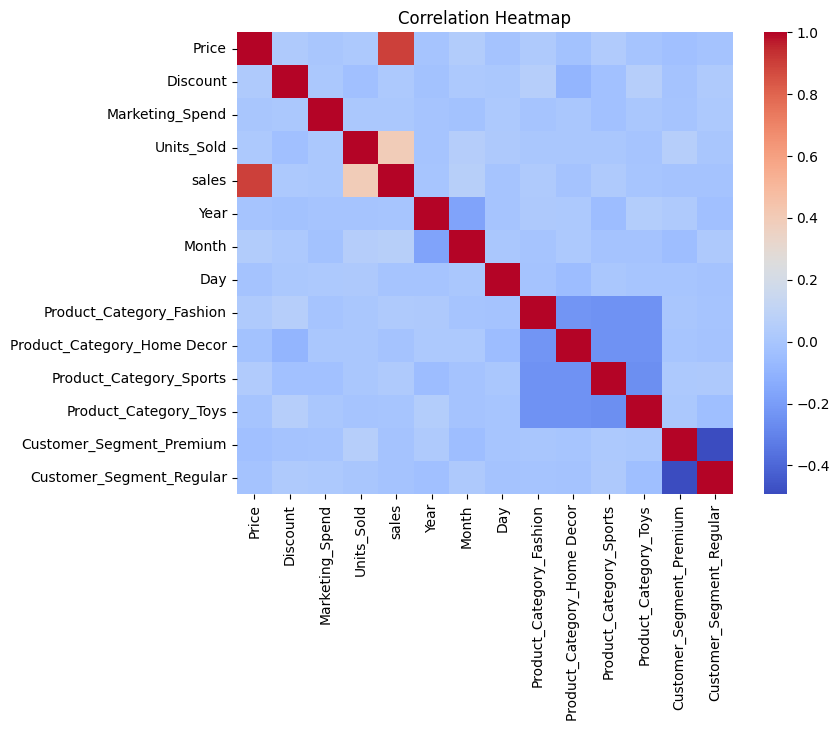


----- Linear Regression -----
R2: 0.9517461257602128
MAE: 1428.2693171244048
MSE: 4120364.1205947795

----- Random Forest -----
R2: 0.99279900821021

Model Comparison:
Random Forest performs better than Linear Regression.


'\n1. Use larger historical datasets.\n2. Add seasonal and promotional features.\n3. Apply advanced models like XGBoost.\n4. Perform hyperparameter tuning.\n5. Deploy as dashboard or web application.\n'

In [2]:
# ==============================================================
# SALES FORECASTING PROJECT
# ==============================================================

# ==============================================================
# 1. Problem Statement
# ==============================================================
"""
The goal of this project is to predict sales using historical
sales data. Machine Learning regression models are used to
understand patterns and forecast future sales.
"""

# ==============================================================
# 2. Import Libraries
# ==============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# ==============================================================
# 3. Dataset Description
# ==============================================================
df = pd.read_excel("sales.xlsx")

print("Dataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


# ==============================================================
# 4. Data Cleaning & Feature Engineering
# ==============================================================

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop original Date column
df.drop("Date", axis=1, inplace=True)

# Convert categorical data into numbers
df = pd.get_dummies(df, drop_first=True)


# ==============================================================
# 5. EDA (Exploratory Data Analysis)
# ==============================================================

# Sales distribution
plt.figure(figsize=(6,4))
sns.histplot(df["sales"], kde=True)
plt.title("Sales Distribution")
# Save image
plt.savefig("sales_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
# Save image
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


# ==============================================================
# 6. Prepare Features & Target
# ==============================================================
X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)


# ==============================================================
# 7. Model Training
# ==============================================================

# -------- Model 1: Linear Regression --------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# -------- Model 2: Random Forest --------
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# ==============================================================
# 8. Model Evaluation & Comparison
# ==============================================================

print("\n----- Linear Regression -----")
lr_r2 = r2_score(y_test, y_pred_lr)
print("R2:", lr_r2)
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))

print("\n----- Random Forest -----")
rf_r2 = r2_score(y_test, y_pred_rf)
print("R2:", rf_r2)

# Model Comparison
print("\nModel Comparison:")
if rf_r2 > lr_r2:
    print("Random Forest performs better than Linear Regression.")
else:
    print("Linear Regression performs better.")


# ==============================================================
# 9. Conclusion
# ==============================================================
"""
The models successfully predicted sales trends.
Random Forest achieved better performance because it captures
non-linear relationships present in sales data.
"""


# ==============================================================
# 10. Future Improvements
# ==============================================================
"""
1. Use larger historical datasets.
2. Add seasonal and promotional features.
3. Apply advanced models like XGBoost.
4. Perform hyperparameter tuning.
5. Deploy as dashboard or web application.
"""